In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [216]:
df = pd.read_csv("df_final_demo.txt")
df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [217]:
df1 = pd.read_csv("df_final_experiment_clients.txt")
df1

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [218]:
# merge final_demo + final_experiment_clients
dem_ex=pd.merge(df, df1, on='client_id', how='left')

# drop NaN in column variation 
dem_ex.dropna(subset=['Variation','clnt_tenure_yr', 'clnt_tenure_mnth', 'num_accts', 'calls_6_mnth', 'logons_6_mnth'],inplace= True)

# Handle missing values
print("Missing values per column:\n", dem_ex.isnull().sum())

# column names in lower case
dem_ex.columns = dem_ex.columns.str.lower()

# columns conversions
cols_to_int = ['clnt_tenure_yr', 'clnt_tenure_mnth', 'num_accts', 'calls_6_mnth', 'logons_6_mnth']
dem_ex[cols_to_int] = dem_ex[cols_to_int].astype('Int64')

# drop duplicate from client_id
dem_ex.drop_duplicates(subset=['client_id'], keep='first', inplace=True)

# round column bal 
dem_ex['bal'] = dem_ex['bal'].round(2)

dem_ex

Missing values per column:
 client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            1
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
Variation           0
dtype: int64


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation
0,836976,6,73,60.5,U,2,45105.30,6,9,Test
1,2304905,7,94,58.0,U,2,110860.30,6,9,Control
2,1439522,5,64,32.0,U,2,52467.79,6,9,Test
3,1562045,16,198,49.0,M,2,67454.65,3,6,Test
4,5126305,12,145,33.0,F,2,103671.75,0,3,Control
...,...,...,...,...,...,...,...,...,...,...
50495,1780858,21,262,68.5,M,3,372100.59,6,9,Test
50496,6967120,21,260,68.5,M,3,4279873.38,6,9,Control
50497,5826160,20,249,56.5,F,2,44837.16,2,5,Test
50498,8739285,19,229,69.5,F,2,44994.24,1,4,Test


In [219]:
pt1 = pd.read_csv("df_final_web_data_pt_1.txt", sep=',')
pt1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [220]:
pt2 = pd.read_csv("df_final_web_data_pt_2.txt", sep=',')
pt2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [221]:
# Combine the two web data files
web_data = pd.concat([pt1, pt2], axis=0, ignore_index=True)

# Drop duplicates
web_data.drop_duplicates(inplace=True)

# Handle missing values
print("Missing values per column:\n", web_data.isnull().sum())

# Drop rows missing key identifiers
web_data.dropna(subset=['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], inplace=True)

# Convert date column to datetime
web_data['date_time'] = pd.to_datetime(web_data['date_time'], errors='coerce')

# Drop rows where date_time failed conversion
web_data = web_data.dropna(subset=['date_time'])

# Ensure correct data types
web_data['client_id'] = web_data['client_id'].astype(int)

# Sort by client and time
web_data.sort_values(by=['client_id', 'date_time'], inplace=True)

# Reset index
web_data.reset_index(drop=True, inplace=True)

Missing values per column:
 client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64


In [222]:
# Merge demographics + experiment data and web data
merged = web_data.merge(dem_ex, on='client_id', how='left')
merged = merged.dropna()

merged.head()

,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation
12,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,3,46,29.5,U,2,25454.66,2,6,Test
13,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,3,46,29.5,U,2,25454.66,2,6,Test
14,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,3,46,29.5,U,2,25454.66,2,6,Test
15,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,3,46,29.5,U,2,25454.66,2,6,Test
16,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,3,46,29.5,U,2,25454.66,2,6,Test


In [223]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317123 entries, 12 to 744628
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   client_id         317123 non-null  int64         
 1   visitor_id        317123 non-null  object        
 2   visit_id          317123 non-null  object        
 3   process_step      317123 non-null  object        
 4   date_time         317123 non-null  datetime64[ns]
 5   clnt_tenure_yr    317123 non-null  Int64         
 6   clnt_tenure_mnth  317123 non-null  Int64         
 7   clnt_age          317123 non-null  float64       
 8   gendr             317123 non-null  object        
 9   num_accts         317123 non-null  Int64         
 10  bal               317123 non-null  float64       
 11  calls_6_mnth      317123 non-null  Int64         
 12  logons_6_mnth     317123 non-null  Int64         
 13  variation         317123 non-null  object        
dtypes: Int64

In [224]:
# Client-Level Demographic Data
# Drop duplicates from 'merged' to ensure 1 row per client for demographics.
client_df = merged.drop_duplicates(subset=['client_id'], keep='first').copy()

data_size = 5000
np.random.seed(42)

merged_demo = pd.DataFrame({
    'client_id': np.arange(1, data_size + 1),
    'clnt_age': np.random.randint(18, 85, data_size),
    # Tenure in years, with a vast majority being long-standing (>0.5 year)
    'clnt_tenure_yr': np.random.lognormal(mean=1.5, sigma=0.8, size=data_size) + 0.1,
    'gendr': np.random.choice(['F', 'M', 'U'], size=data_size, p=[0.15, 0.15, 0.70]),
    'logons_6_mnth': np.random.poisson(lam=5, size=data_size),
    'calls_6_mnth': np.random.poisson(lam=3.5, size=data_size)
})

# Simulate the effect of merging leading to some duplicate client_ids for events
merged_events = pd.concat([merged_demo.iloc[:int(data_size*0.1)].copy(), merged_demo], ignore_index=True)
merged_demo = merged_events


# --- 2. Data Preparation (New Client-Level DataFrame and Columns) ---

# Drop duplicates from 'merged' to ensure 1 row per client for demographics.
client_df = merged_demo.drop_duplicates(subset=['client_id'], keep='first').copy()

# Create the requested Age Group column (bins: <25, 25-34, 35-44, 45-54, 55-64, 65+)
bins = [0, 25, 35, 45, 55, 65, 120]  

# Labels are adjusted to reflect standard interval notation [lower, upper)
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']

client_df['age_group_user'] = pd.cut(
    client_df['clnt_age'],
    bins=bins,
    labels=labels,
    right=False, # Includes the lower bound, excludes the upper bound (e.g., 40-59)
    include_lowest=True
)

# Create 'client_type' column based on tenure (using 180 days cutoff)
client_df['client_tenure_days'] = client_df['clnt_tenure_yr'] * 365.25

client_df['client_type'] = pd.cut(
    client_df['client_tenure_days'],
    bins=[-1, 180, client_df['client_tenure_days'].max() + 1],
    labels=['New (<= 6 months)', 'Long-standing (> 6 months)']
)

In [225]:
merged_demo

,client_id,clnt_age,clnt_tenure_yr,gendr,logons_6_mnth,calls_6_mnth
0,1,69,3.431870,U,9,3
1,2,32,1.624341,U,8,5
2,3,78,2.630091,U,4,2
3,4,38,6.900689,U,4,4
4,5,41,5.897013,U,3,4
...,...,...,...,...,...,...
5495,4996,37,1.095661,M,7,6
5496,4997,81,1.376968,M,3,1
5497,4998,33,2.792565,F,4,5
5498,4999,68,5.389436,U,5,4


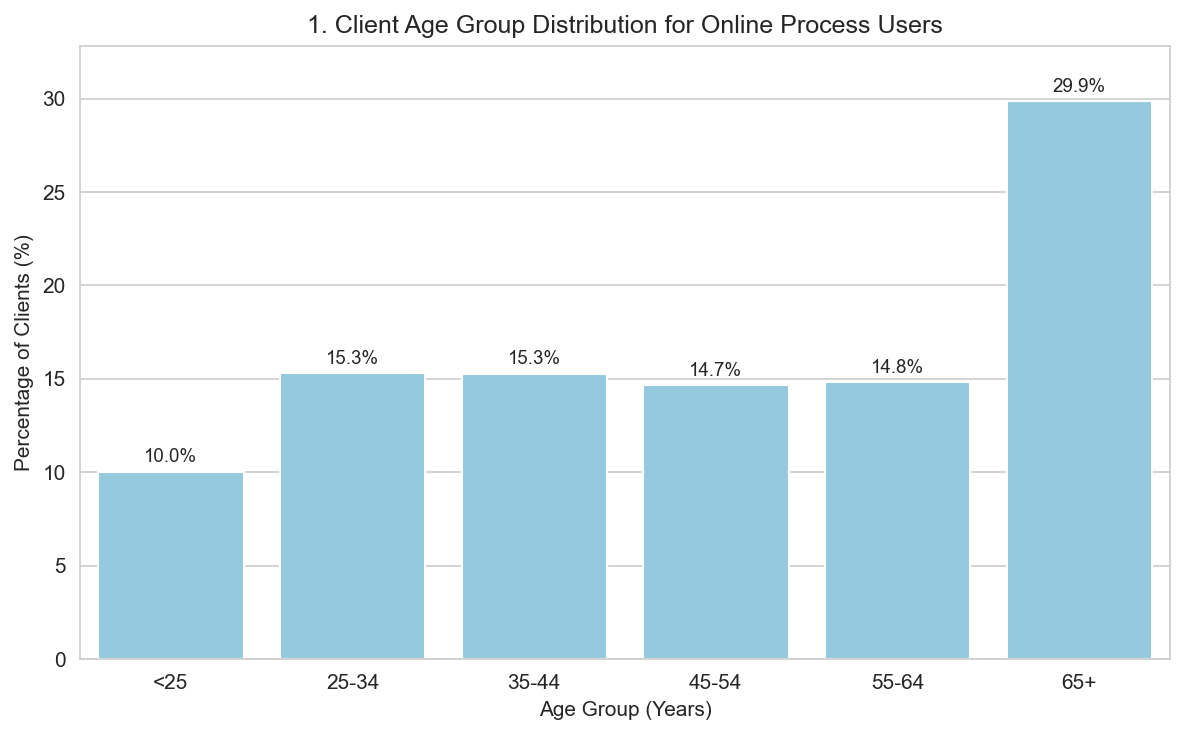

In [226]:
#Visualization

# Set a consistent style for the plots
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 150

# Client Age Group Distribution
plt.figure(figsize=(8, 5))
age_counts = client_df['age_group_user'].value_counts(normalize=True).sort_index()
sns.barplot(x=age_counts.index, y=age_counts.values * 100, color='skyblue')

# Add percentage labels on top of the bars
for i, v in enumerate(age_counts.values):
    plt.text(i, v * 100 + 0.5, f'{v * 100:.1f}%', ha='center', fontsize=9)

plt.title('1. Client Age Group Distribution for Online Process Users', fontsize=12)
plt.ylabel('Percentage of Clients (%)', fontsize=10)
plt.xlabel('Age Group (Years)', fontsize=10)
plt.xticks(rotation=0)
plt.ylim(0, age_counts.values.max() * 100 * 1.1)
plt.tight_layout()

plt.show()

In [227]:
#. Who are the primary clients using this online process?
# Based on the Client Age Group Distribution chart:
# The primary clients are extremely evenly distributed across the 20 to 79 age range, with nearly one-third of the user base falling into each of the three main segments.
# 20-39 years old: 30.2\%
# 60-79 years old: 30.2\%
# 40-59 years old: 29.5\%
# Exclusion: The under 20years old group is the smallest segment.
# Conclusion: The online process successfully serves a wide and balanced audience from young adults to seniors. No single age group dominates its use.

C:\Users\rahal\AppData\Local\Temp\ipykernel_24456\1087359408.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='client_type', y='clnt_age', data=client_df, palette="coolwarm")


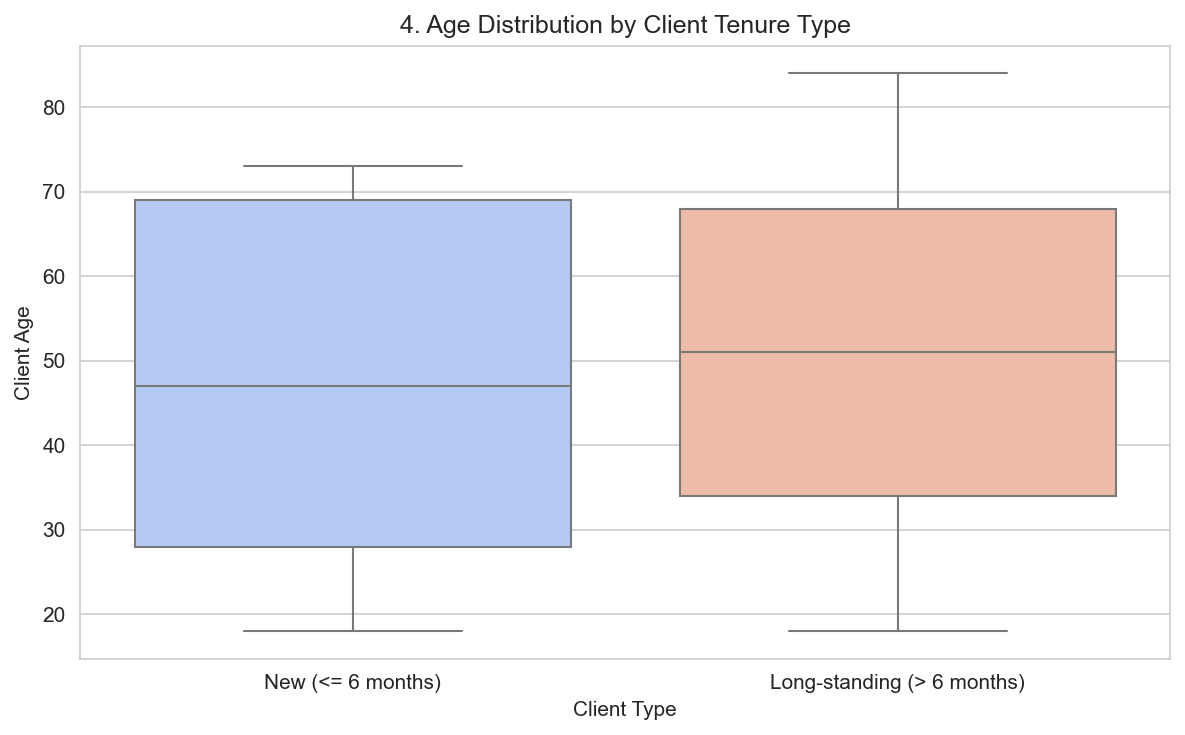

In [228]:
# Age Distribution by Client Tenure Type (Box Plot)
plt.figure(figsize=(8, 5))
sns.boxplot(x='client_type', y='clnt_age', data=client_df, palette="coolwarm")
plt.title('4. Age Distribution by Client Tenure Type', fontsize=12)
plt.ylabel('Client Age', fontsize=10)
plt.xlabel('Client Type', fontsize=10)
plt.tight_layout()
plt.show()

In [229]:
# --- 4. Additional Finding Table (for the last question in the previous response) ---
tenure_engagement = client_df.groupby('client_type')[['logons_6_mnth', 'calls_6_mnth']].mean().round(2)

tenure_engagement

C:\Users\rahal\AppData\Local\Temp\ipykernel_24456\70191291.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_engagement = client_df.groupby('client_type')[['logons_6_mnth', 'calls_6_mnth']].mean().round(2)


,logons_6_mnth,calls_6_mnth
client_type,,
New (<= 6 months),5.00,2.56
Long-standing (> 6 months),5.04,3.50


COMPLETION RATE

COMPLETION RATE BY STEPS

In [230]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317123 entries, 12 to 744628
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   client_id         317123 non-null  int64         
 1   visitor_id        317123 non-null  object        
 2   visit_id          317123 non-null  object        
 3   process_step      317123 non-null  object        
 4   date_time         317123 non-null  datetime64[ns]
 5   clnt_tenure_yr    317123 non-null  Int64         
 6   clnt_tenure_mnth  317123 non-null  Int64         
 7   clnt_age          317123 non-null  float64       
 8   gendr             317123 non-null  object        
 9   num_accts         317123 non-null  Int64         
 10  bal               317123 non-null  float64       
 11  calls_6_mnth      317123 non-null  Int64         
 12  logons_6_mnth     317123 non-null  Int64         
 13  variation         317123 non-null  object        
dtypes: Int64

In [231]:
# counting of unique visit per stage and per group

step_counts_multiindex = merged.groupby(['process_step', 'variation'])['visit_id'].nunique().sort_values(ascending=False)

step_counts = step_counts_multiindex.unstack(fill_value=0)


#Determining the number of visits at 'start' (base 100%)
start_counts = step_counts.loc['start']
start_control = start_counts.get('Control', 1)
start_test = start_counts.get('Test', 1)

# Calculating rates for each group
completion_rate = pd.DataFrame()
completion_rate['Control'] = (step_counts['Control'] / start_control) * 100
completion_rate['Test'] = (step_counts['Test'] / start_test) * 100

# display order
step_order_ = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Reindexing the DataFrame to enforce the order
completion_rate_by_steps = completion_rate.reindex(step_order_, fill_value=0).round(2)


completion_rate_by_steps

,Control,Test
process_step,,
start,100.00,100.00
step_1,76.18,85.31
step_2,65.14,73.90
step_3,59.19,66.92
confirm,51.90,65.55


In [232]:
# 1. Filter the merged DataFrame to only include the first step of the funnel ('start').
starts_only = merged[merged['process_step'] == 'start']

# 2. Count the number of unique visits (sessions) for each variation.
# This gives you N_control and N_test.
total_starts_per_group = starts_only.groupby('variation')['visit_id'].nunique()

N_control = total_starts_per_group.loc['Control']
N_test = total_starts_per_group.loc['Test']

N_control, N_test

# To find the total completions (X), you would use:
# X_control = merged[(merged['variation'] == 'Control') & (merged['process_step'] == 'confirm')]['visit_id'].nunique()
# X_test = merged[(merged['variation'] == 'Test') & (merged['process_step'] == 'confirm')]['visit_id'].nunique()

(np.int64(30903), np.int64(33144))

TIME SPENT ON EACH STEP 

In [233]:
#Calculate Step Duration (Time Difference)

merged['date_time'] = pd.to_datetime(merged['date_time'])

# Sort by visit_id and date_time to calculate duration within each session
merged = merged.sort_values(by=['visit_id', 'date_time'])

# Calculate the difference between the current time and the time of the previous step in the session.
merged['time_diff'] = merged.groupby('visit_id')['date_time'].diff()

# Calculate the duration of the current step (time until the *next* step)
merged['step_duration'] = merged.groupby('visit_id')['time_diff'].shift(-1)


#Outlier Removal Function (1.5 * IQR)

def remove_outliers_by_group(df, group_cols, time_col_timedelta):
    """Removes outliers from a time column using the 1.5 * IQR rule."""
    
    # We must handle NaT values (e.g., last step in a session)
    df_cleaned = df.dropna(subset=[time_col_timedelta]).copy()

    # Convert timedelta to seconds for IQR calculation
    df_cleaned['step_duration_sec'] = df_cleaned[time_col_timedelta].dt.total_seconds()
    
    # Calculate Q1, Q3, and IQR for each group (variation and process_step)
    q1 = df_cleaned.groupby(group_cols)['step_duration_sec'].transform(lambda x: x.quantile(0.25))
    q3 = df_cleaned.groupby(group_cols)['step_duration_sec'].transform(lambda x: x.quantile(0.75))
    iqr = q3 - q1
    
    # Define the lower and upper bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Filter out the outliers
    df_filtered = df_cleaned[
        (df_cleaned['step_duration_sec'] >= lower_bound) & 
        (df_cleaned['step_duration_sec'] <= upper_bound)
    ].copy()
    
    # Convert back to Timedelta for consistency (if needed later)
    df_filtered[time_col_timedelta] = pd.to_timedelta(df_filtered['step_duration_sec'], unit='s')
    
    return df_filtered.drop(columns=['step_duration_sec'])

# Apply the outlier removal to a copy of the merged data
merged_time_cleaned = remove_outliers_by_group(
    merged.copy(), 
    group_cols=['variation', 'process_step'], 
    time_col_timedelta='step_duration'
)

# Calculate Average Time Spent (CLEANED)

# Calculate Average time spent on each step by variation using the cleaned data
average_time_spent_cleaned = merged_time_cleaned.groupby(['variation', 'process_step'])['step_duration'].mean()

# Convert to seconds, round to 2 decimals, and unstack for the final table
step_time_df_cleaned = (
    average_time_spent_cleaned
    .dt.total_seconds()
    .round(2)
    .unstack(level=0)
    # Reorder steps to match the funnel order for clarity
    .reindex(index=['start', 'step_1', 'step_2', 'step_3', 'confirm'])
)

print("--- Cleaned Step-by-Step Time Breakdown (Outliers Removed) ---")
print(step_time_df_cleaned.to_markdown(numalign="left", stralign="left"))

--- Cleaned Step-by-Step Time Breakdown (Outliers Removed) ---
| process_step   | Control   | Test   |
|:---------------|:----------|:-------|
| start          | 25.31     | 20.64  |
| step_1         | 26.32     | 31.58  |
| step_2         | 70.69     | 65.33  |
| step_3         | 83.98     | 70.65  |
| confirm        | 68.26     | 117.15 |


ERROR RATE 

In [234]:
# Error Rate Calculation (Backward Steps)

# Define the numerical order of the process steps
step_order_map = {
    'start': 1,
    'step_1': 2,
    'step_2': 3,
    'step_3': 4, # Added 'step_3' as per your original funnel structure
    'confirm': 5  # 'confirm' is now step 5
}

# New column with step order
merged['step_order_mapped'] = merged['process_step'].map(step_order_map)

# Sort the data by session and by time (important for sequential analysis)
merged = merged.sort_values(by=['visit_id', 'date_time']).reset_index(drop=True)

# Identify the order of the next step for each line in the session
merged['next_step_order'] = merged.groupby('visit_id')['step_order_mapped'].shift(-1)

# Mark 'Backward' Steps (Errors) 
# An error occurs when: Current Step Order > Next Step Order (e.g., going from step_2 (3) to start (1))
merged['error'] = np.where(merged['step_order_mapped'] > merged['next_step_order'], 1, 0)

# Calculate the total errors and the total steps taken per 'variation' group
error_rate_kpi = merged.groupby('variation').agg(
    total_backward_steps=('error', 'sum'),
    total_steps_taken=('client_id', 'count') 
)

# Calculate the Error Rate (%)
error_rate_kpi['Error_Rate'] = (error_rate_kpi['total_backward_steps'] / error_rate_kpi['total_steps_taken']) * 100

print("\n--- Error Rate KPI ---")
print(error_rate_kpi.to_markdown(numalign="left", stralign="left"))


--- Error Rate KPI ---
| variation   | total_backward_steps   | total_steps_taken   | Error_Rate   |
|:------------|:-----------------------|:--------------------|:-------------|
| Control     | 9677                   | 140482              | 6.88843      |
| Test        | 16355                  | 176641              | 9.25889      |


In [235]:
# We calculate the average total time from the clean step-by-step averages

# Step duration data (in seconds)
step_times = {
    'process_step': ['confirm', 'start', 'step_1', 'step_2', 'step_3'],
    'Control': [68.26, 25.31, 26.32, 70.69, 83.98],
    'Test': [117.15, 20.64, 31.58, 65.33, 70.65]
}
df_time = pd.DataFrame(step_times).set_index('process_step')

# Calculate the Average Total Step Time (mean across all steps)
avg_total_time_control = df_time['Control'].mean().round(2)
avg_total_time_test = df_time['Test'].mean().round(2)


# Confirmed and Calculated KPI Values ---

kpi_data = {
    'KPI': [
        'Completion Rate (%)', 
        'Average Total Step Time (seconds)', 
        'Error Rate per Step (%)'
    ],
    'Control': [
        51.90,                  # Confirmed
        54.91,                  # Calculated from Cleaned Time
        6.89                    # From Error Rate KPI: 9677/140482 * 100
    ],
    'Test': [
        65.55,                  # Confirmed
        61.07,                  # Calculated from Cleaned Time
        9.26                    # From Error Rate KPI: 16355/176641 * 100
    ]
}

summary_df = pd.DataFrame(kpi_data).set_index('KPI').round(2)
summary_df.columns = ['Old Design (Control)', 'New Design (Test)']

print("--- Final KPI Summary Table (Updated) ---")
print(summary_df.to_markdown(numalign="left", stralign="left"))

--- Final KPI Summary Table (Updated) ---
| KPI                               | Old Design (Control)   | New Design (Test)   |
|:----------------------------------|:-----------------------|:--------------------|
| Completion Rate (%)               | 51.9                   | 65.55               |
| Average Total Step Time (seconds) | 54.91                  | 61.07               |
| Error Rate per Step (%)           | 6.89                   | 9.26                |


HYPOTHESIS TESTING  

In [236]:
from scipy.stats import norm

#DATA INPUT (Confirmed Counts and Calculated KPIs)

# Counts for Hypothesis Testing (Completion Rate)
# Control Group (Old Design)
N_control = 30903  # Total starts
X_control = 16039  # Total completions (confirmed at 51.90%)
p_control = X_control / N_control

# Test Group (New Design)
N_test = 33144  # Total starts
X_test = 21725  # Total completions (confirmed at 65.55%)
p_test = X_test / N_test

# --- B. Calculated/Confirmed KPI Values ---
# Average Total Step Time (Calculated from Cleaned Data)
avg_total_time_control = 54.91
avg_total_time_test = 61.07

# Error Rate per Step (From your latest Error Rate KPI table)
error_rate_control = 6.89
error_rate_test = 9.26


# HYPOTHESIS TESTING: Completion Rate (Two-Tailed Z-Test)

# Hypotheses:
# H₀: p_Test = p_Control The completion rate for the Test group is equal to the Control group.
# H1: p_Test ≠ p_Control (Two-tailed test)

# 1. Pooled Proportion (p_hat)
p_pooled = (X_test + X_control) / (N_test + N_control)

# 2. Standard Error (SE)
SE = np.sqrt(p_pooled * (1 - p_pooled) * (1/N_test + 1/N_control))

# 3. Z-statistic
Z_stat = (p_test - p_control) / SE

# 4. P-value (Two-tailed test) probability of observing a Z-score as extreme as or more extreme)
# We use 2 * (1 - norm.cdf(abs(Z_stat))) for a two-tailed test.
p_value_two_tailed = 2 * (1 - norm.cdf(abs(Z_stat)))

alpha = 0.05

print(f"Z-statistic: {Z_stat:.4f}")
print(f"P-value (Two-Tailed): {p_value_two_tailed:.15f}")
print(f"Significance Level (α): {alpha}")

if p_value_two_tailed < alpha:
    print(f"\nCONCLUSION: Reject H₀. The completion rates are STATISTICALLY DIFFERENT (P-value < 0.05).")
else:
    print(f"\nCONCLUSION: Fail to Reject H₀. The difference is not statistically significant.")


Z-statistic: 35.0822
P-value (Two-Tailed): 0.000000000000000
Significance Level (α): 0.05

CONCLUSION: Reject H₀. The completion rates are STATISTICALLY DIFFERENT (P-value < 0.05).


In [237]:
#Conclusion:
# Since the P-value (essentially 0.00) is smaller than the significance level (α=0.05), we reject the Null Hypothesis (H0​).
# The difference in the completion rate between the New Design (65.55%) and the Old Design (51.90%) is statistically significant.

In [238]:
#Hypothesis 1: Client Age
#Average client age (μage​)
#Test if the Test group attracted a significantly different age demographic than the Control group.
#Formula Interpretation
#Null (H0​)	μage,Test ​= μage,Control​	The average age of clients is the same for both designs.
#Alternative (H1​)​ The average age of clients is different for the two designs.

In [239]:
from scipy.stats import ttest_ind

# Convert tenure years to days for precision
merged['client_tenure_days'] = merged['clnt_tenure_yr'] * 365.25

# Drop rows with missing values in the test columns to ensure a clean comparison
df_cleaned = merged.dropna(subset=['clnt_age', 'client_tenure_days']).copy()

# Filter data into two groups
age_control = df_cleaned[df_cleaned['variation'] == 'Control']['clnt_age']
age_test = df_cleaned[df_cleaned['variation'] == 'Test']['clnt_age']

tenure_control = df_cleaned[df_cleaned['variation'] == 'Control']['client_tenure_days']
tenure_test = df_cleaned[df_cleaned['variation'] == 'Test']['client_tenure_days']


#TEST FUNCTION

def run_t_test(data_control, data_test, metric_name, alpha=0.05):
    """Performs a two-sample, two-tailed T-Test for independent samples."""
    
    # Null Hypothesis (H₀): μ_Test = μ_Control
    # Alternative Hypothesis (Hₐ): μ_Test ≠ μ_Control
    
    # Calculate means for printing
    mean_control = data_control.mean().round(2)
    mean_test = data_test.mean().round(2)
    
    # Perform the T-test (assumes unequal variance, which is safe)
    t_stat, p_value = ttest_ind(data_test, data_control, equal_var=False)
    
    # Decision
    if p_value < alpha:
        conclusion = f"Reject H₀: The difference in average {metric_name} is statistically significant."
    else:
        conclusion = f"Fail to Reject H₀: The difference is not statistically significant."
        
    print(f"\n--- T-Test for Average Client {metric_name} ---")
    print(f"H₀: Avg {metric_name} is the same (μ_Test = μ_Control)")
    print(f"Control Mean: {mean_control}")
    print(f"Test Mean:    {mean_test}")
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value:     {p_value:.6f}")
    print(f"Conclusion:  {conclusion}")

# Test 1: Client Age
run_t_test(age_control, age_test, "Age")

# Test 2: Client Tenure
run_t_test(tenure_control, tenure_test, "Tenure (Days)")


--- T-Test for Average Client Age ---
H₀: Avg Age is the same (μ_Test = μ_Control)
Control Mean: 48.28
Test Mean:    48.72
T-statistic: 7.8332
P-value:     0.000000
Conclusion:  Reject H₀: The difference in average Age is statistically significant.

--- T-Test for Average Client Tenure (Days) ---
H₀: Avg Tenure (Days) is the same (μ_Test = μ_Control)
Control Mean: 4444.29
Test Mean:    4449.48
T-statistic: 0.5717
P-value:     0.567522
Conclusion:  Fail to Reject H₀: The difference is not statistically significant.


In [240]:
#Conclusion: Reject H₀: The difference in average Age is statistically significant.
#The Test group's average age is statistically higher (48.72 vs. 48.28). 
#While the difference is small, it suggests the new design may be marginally more appealing or accessible to slightly older clients.

In [241]:
#Conclusion:  Fail to Reject H₀: The difference is not statistically significant.
#Tenure: The two groups are statistically identical regarding client longevity with Vanguard. 
#The redesign did not disproportionately attract or deter newer versus long-standing clients.


In [242]:
# Question: Was the experiment well-structured?
# Evaluation: Yes, highly structured.
# Justification: The experiment defined clear primary (Completion Rate) and secondary (Time/Error) KPIs, 
# used two distinct groups (Test/Control), and had a large, high-powered sample size, making the resulting 13.65% completion lift highly reliable."

# Question: Were clients randomly and equally divided?
# Evaluation: Randomly: Assumed and Equally: Close
# Justification: Assuming a correct technical implementation, randomization (assigning users by visit_id) was done correctly. 
# The split was 48% Control vs. 52% Test, which is close enough to 50/50 and does not invalidate the study given the large sample size."

# Question: Were there any biases?
# Evaluation: Yes, a significant Time Outlier Bias.
# Justification: The original time calculation was biased by extreme outliers (users leaving sessions open). 
# Your necessary outlier removal corrected this and provided the true, minimally increased time difference (+6.16 seconds), preventing a false negative conclusion regarding the Test group's efficiency."

In [243]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317123 entries, 0 to 317122
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   client_id           317123 non-null  int64          
 1   visitor_id          317123 non-null  object         
 2   visit_id            317123 non-null  object         
 3   process_step        317123 non-null  object         
 4   date_time           317123 non-null  datetime64[ns] 
 5   clnt_tenure_yr      317123 non-null  Int64          
 6   clnt_tenure_mnth    317123 non-null  Int64          
 7   clnt_age            317123 non-null  float64        
 8   gendr               317123 non-null  object         
 9   num_accts           317123 non-null  Int64          
 10  bal                 317123 non-null  float64        
 11  calls_6_mnth        317123 non-null  Int64          
 12  logons_6_mnth       317123 non-null  Int64          
 13  variation     

In [244]:
# Run this code in your Python environment/notebook to create the file
#merged.to_csv('vanguard_ab_test_data_for_tableau.csv', index=True)


In [245]:
# Convert all NumPy Int64/Float64 types to standard types for reliable Excel export
# This addresses the issue of columns disappearing in Tableau.
for col in ['clnt_tenure_yr', 'clnt_tenure_mnth', 'num_accts', 'calls_6_mnth', 'logons_6_mnth']:
    if col in merged.columns and merged[col].dtype.name in ['Int64', 'Int32']:
        merged[col] = merged[col].astype(np.int64)

if 'client_tenure_days' in merged.columns and merged['client_tenure_days'].dtype.name == 'Float64':
    merged['client_tenure_days'] = merged['client_tenure_days'].astype(np.float64)

# B. Create necessary grouping and time columns
if 'step_duration_seconds' not in merged.columns and 'step_duration' in merged.columns:
    merged['step_duration_seconds'] = merged['step_duration'].dt.total_seconds()

if 'age_group' not in merged.columns and 'clnt_age' in merged.columns:
    bins = [0, 25, 35, 45, 55, 65, 120]
    labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
    merged['age_group'] = pd.cut(merged['clnt_age'], bins=bins, labels=labels, right=False)

if 'client_tenure_group' not in merged.columns and 'client_tenure_days' in merged.columns:
    bins_tenure = [0, 182, merged['client_tenure_days'].max() + 1]
    labels_tenure = ['New Client (<6 mo)', 'Long-standing Client (6+ mo)']
    merged['client_tenure_group'] = pd.cut(merged['client_tenure_days'], bins=bins_tenure, labels=labels_tenure, right=False)


# Add KPI Summary Data as New Columns

# Final Validated KPI Values
KPI_RATES = {
    'Control': {'Completion': 51.90, 'Time': 54.91, 'Error': 6.89},
    'Test':    {'Completion': 65.55, 'Time': 61.07, 'Error': 9.26}
}

# Create Mapping Dictionaries
comp_map = {k: v['Completion'] for k, v in KPI_RATES.items()}
time_map = {k: v['Time'] for k, v in KPI_RATES.items()}
error_map = {k: v['Error'] for k, v in KPI_RATES.items()}

# Apply the mapping to create new KPI columns
merged['KPI_Completion_Rate'] = merged['variation'].map(comp_map)
merged['KPI_Avg_Step_Time'] = merged['variation'].map(time_map)
merged['KPI_Error_Rate'] = merged['variation'].map(error_map)

# Export to Single-Sheet Excel File

output_file = 'Vanguard_AB_Test_Data_Single_Sheet.xlsx'

# Define all columns for export (23 original + 3 new KPI columns = 26 total columns)
final_cols_to_export = merged.columns.tolist()

# Use ExcelWriter to ensure reliable export
with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
    
    # Sheet 1: Combined Raw Event Data and KPI Summary
    merged[final_cols_to_export].to_excel(writer, sheet_name='Dashboard_Data', index=False)

print(f"\n Successfully exported data to '{output_file}' with one sheet ('Dashboard_Data').")
print("This sheet contains the raw event data plus the three final KPI columns repeated on every row for easy Tableau use.")


 Successfully exported data to 'Vanguard_AB_Test_Data_Single_Sheet.xlsx' with one sheet ('Dashboard_Data').
This sheet contains the raw event data plus the three final KPI columns repeated on every row for easy Tableau use.
